In [1]:
from ultralytics import YOLO
import cv2
from ultralytics.utils.plotting import Annotator
import math
from PIL import Image

In [2]:
model = YOLO('./runs/detect/yolov8m_climbing_crux_model6/weights/best.pt')
names = model.model.names

In [3]:
img = cv2.imread('./../datasets/images/test/23.jpeg')

In [4]:
h, w = img.shape[:2]

In [5]:
center_point = (w//2, h)

In [6]:
# Example calculation of pixel_per_meter for a given object size in pixels and real world size in meters.
real_world_size_m = 2  # meters
object_size_pixels = 200  # pixels
pixel_per_meter = object_size_pixels / real_world_size_m

In [7]:
txt_color, txt_background, bbox_clr = ((0, 0, 0), (255, 255, 255), (255, 0, 255))

In [8]:
annotator = Annotator(img, line_width=2)

In [9]:
results = model.track(img, persist=True)
boxes = results[0].boxes.xyxy.cpu()

0: 800x608 85 holds, 1 volume, 811.0ms
Speed: 7.0ms preprocess, 811.0ms inference, 13.2ms postprocess per image at shape (1, 3, 800, 608)


In [10]:
if results[0].boxes.id is not None:
    track_ids = results[0].boxes.id.int().cpu().tolist()

    for box, track_id in zip(boxes, track_ids):
        annotator.box_label(box, label=str(track_id), color=bbox_clr)
        annotator.visioneye(box, center_point)

        x1, y1 = int((box[0] + box[2]) // 2), int((box[1] + box[3]) // 2)    # Bounding box centroid

        distance = (math.sqrt((x1 - center_point[0]) ** 2 + (y1 - center_point[1]) ** 2))/pixel_per_meter

        text_size, _ = cv2.getTextSize(f"Distance: {distance:.2f} m", cv2.FONT_HERSHEY_SIMPLEX,1.2, 3)
        cv2.rectangle(img, (x1, y1 - text_size[1] - 10),(x1 + text_size[0] + 10, y1), txt_background, -1)
        cv2.putText(img, f"Distance: {distance:.2f} m",(x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 1.2,txt_color, 3)

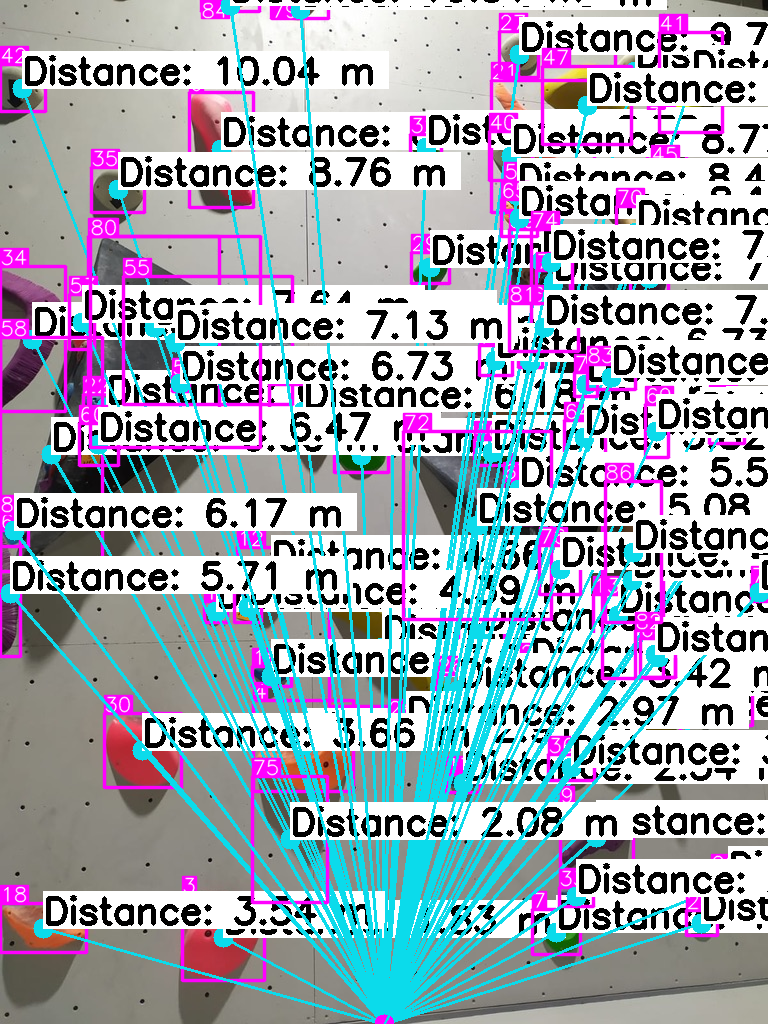

In [11]:
preview = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
display(Image.fromarray(preview))